In [1]:
# Import necessary libraries
import pandas as pd

# Specify the path to your dataset
file_path = "D:/plant/crop_yield.csv" # Replace with your actual file path

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Print the DataFrame
print(data)


                Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0

In [3]:
missing = data.isnull().sum()


In [5]:
# Show total missing values
print(data.isnull().sum())

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

missing = data.isnull().sum()
missing = missing[missing > 0]


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [6]:
# Fill numeric columns with median
df_filled = data.fillna(data.median(numeric_only=True))


In [9]:
data['Annual_Rainfall'] = data['Annual_Rainfall'].fillna(data['Annual_Rainfall'].median())


In [13]:
region_map = {
    # North India
    'Jammu and Kashmir': 'North', 'Himachal Pradesh': 'North', 'Punjab': 'North',
    'Uttarakhand': 'North', 'Haryana': 'North', 'Delhi': 'North',
    'Rajasthan': 'North', 'Uttar Pradesh': 'North',

    # East India
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',

    # Northeast India
    'Assam': 'Northeast', 'Arunachal Pradesh': 'Northeast', 'Manipur': 'Northeast',
    'Meghalaya': 'Northeast', 'Mizoram': 'Northeast', 'Nagaland': 'Northeast',
    'Tripura': 'Northeast', 'Sikkim': 'Northeast',

    # Central India
    'Madhya Pradesh': 'Central', 'Chhattisgarh': 'Central',

    # West India
    'Gujarat': 'West', 'Maharashtra': 'West', 'Goa': 'West',

    # South India
    'Andhra Pradesh': 'South', 'Telangana': 'South', 'Karnataka': 'South',
    'Kerala': 'South', 'Tamil Nadu': 'South', 'Puducherry': 'South'
}

# Create a new column 'Region' based on the 'State'
data['Region'] = data['State'].map(region_map)

# Check for unmatched states (optional)
unmatched = data[data['Region'].isna()]['State'].unique()
if len(unmatched) > 0:
    print("Unmatched States:", unmatched)

# Save updated dataset to CSV (optional)
data.to_csv("crop_yield_with_region.csv", index=False)

# Display the first few rows
print(data.head())

           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield     Region  
0           2051.4  7024878.38   22882.34     0.796087  Northeast  
1           2051.4   631643.29    2057.47     0.710435  Northeast  
2           2051.4    75755.32     246.76     0.238333  Northeast  
3           2051.4  1870661.52    6093.36  5238.051739  Northeast  
4           2051.4   165500.63     539.09     0.420909  Northeast  


In [21]:


# Mapping of Indian states to approximate central latitude and longitude
state_coords = {
    'Andhra Pradesh': (15.9129, 79.7400),
    'Arunachal Pradesh': (28.2180, 94.7278),
    'Assam': (26.2006, 92.9376),
    'Bihar': (25.0961, 85.3131),
    'Chhattisgarh': (21.2787, 81.8661),
    'Goa': (15.2993, 74.1240),
    'Gujarat': (22.2587, 71.1924),
    'Haryana': (29.0588, 76.0856),
    'Himachal Pradesh': (31.1048, 77.1734),
    'Jammu and Kashmir': (33.7782, 76.5762),
    'Jharkhand': (23.6102, 85.2799),
    'Karnataka': (15.3173, 75.7139),
    'Kerala': (10.8505, 76.2711),
    'Madhya Pradesh': (22.9734, 78.6569),
    'Maharashtra': (19.7515, 75.7139),
    'Manipur': (24.6637, 93.9063),
    'Meghalaya': (25.4670, 91.3662),
    'Mizoram': (23.1645, 92.9376),
    'Nagaland': (26.1584, 94.5624),
    'Odisha': (20.9517, 85.0985),
    'Punjab': (31.1471, 75.3412),
    'Rajasthan': (27.0238, 74.2179),
    'Sikkim': (27.5330, 88.5122),
    'Tamil Nadu': (11.1271, 78.6569),
    'Telangana': (18.1124, 79.0193),
    'Tripura': (23.9408, 91.9882),
    'Uttar Pradesh': (26.8467, 80.9462),
    'Uttarakhand': (30.0668, 79.0193),
    'West Bengal': (22.9868, 87.8550),
    'Delhi': (28.7041, 77.1025),
    'Puducherry': (11.9139, 79.8145)
}

# Add new columns using mapping
data['Latitude'] = data['State'].map(lambda x: state_coords.get(x, (None, None))[0])
data['Longitude'] = data['State'].map(lambda x: state_coords.get(x, (None, None))[1])

# Save the updated dataset
data.to_csv("crop_yield_with_region_coords.csv", index=False)

# Optional: print preview
print(data[['State', 'Region', 'Latitude', 'Longitude']].drop_duplicates().head())
data.head()


          State     Region  Latitude  Longitude
0         Assam  Northeast   26.2006    92.9376
27    Karnataka      South   15.3173    75.7139
57       Kerala      South   10.8505    76.2711
62    Meghalaya  Northeast   25.4670    91.3662
88  West Bengal       East   22.9868    87.8550


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Region,Latitude,Longitude
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,Northeast,26.2006,92.9376
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,Northeast,26.2006,92.9376
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,Northeast,26.2006,92.9376
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,Northeast,26.2006,92.9376
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,Northeast,26.2006,92.9376


In [33]:
data.to_csv("Updated_Dataset.csv", index=False)


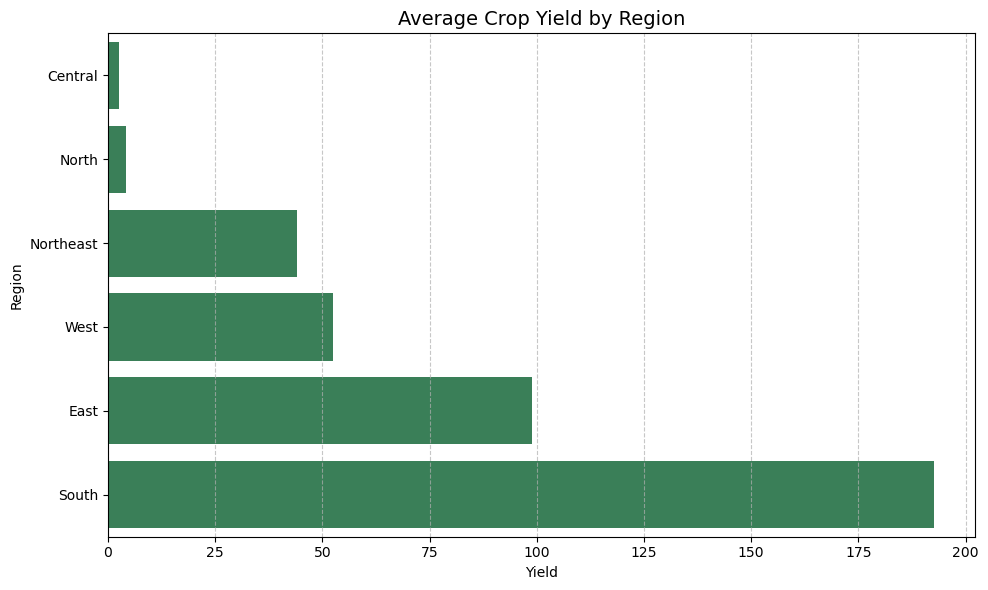

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set green and blue theme
sns.set_palette(['#2E8B57', '#1E90FF']) 

# Average yield by region
region_yield = data.groupby('Region')['Yield'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_yield.values, y=region_yield.index)
plt.title('Average Crop Yield by Region', fontsize=14)
plt.xlabel('Yield')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
import plotly.express as px

# Custom green and purple color sequence
custom_colors = ['#2E8B57', '#6A5ACD', '#32CD32', '#8A2BE2', '#3CB371', '#9370DB']

fig = px.scatter_geo(
    data,
    lat='Latitude',
    lon='Longitude',
    color='Region',
    size='Yield',
    projection='natural earth',
    title='Crop Yield Distribution Across India',
    color_discrete_sequence=custom_colors
)

fig.show()
import plotly.express as px

# Custom green and purple color sequence
custom_colors = ['#2E8B57', '#6A5ACD', '#32CD32', '#8A2BE2', '#3CB371', '#9370DB']

fig = px.scatter_geo(
    data,
    lat='Latitude',
    lon='Longitude',
    color='Region',
    size='Yield',
    projection='natural earth',
    title='Crop Yield Distribution Across India',
    color_discrete_sequence=custom_colors
)

fig.show()


NameError: name 'df' is not defined